In [41]:
# import required packages
import numpy as np 
import pandas as pd 
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

# Interactive Visualization
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import os
for dirname, _, filenames in os.walk('cps_01_formatted.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [42]:
# read in the data 
df_population = pd.read_csv('cps_01_formatted.csv')
df_shooting = pd.read_csv('pah_wikp_combo.csv')

In [43]:
df_shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         797 non-null    object 
 1   City         797 non-null    object 
 2   State        797 non-null    object 
 3   AreaType     381 non-null    object 
 4   School       795 non-null    object 
 5   Fatalities   797 non-null    int64  
 6   Wounded      416 non-null    float64
 7   Dupe         138 non-null    object 
 8   Source       797 non-null    object 
 9   Desc         414 non-null    object 
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
dtypes: float64(3), int64(1), object(8)
memory usage: 74.8+ KB


In [44]:
# Cleaning the data to have 'Date', 'City', 'State', 'School' and 'Fatalities' columns of the school
# shooting dataset will be used. 
# The last 2 columns (unnamed) are unidentifiable, so they will not be considere in this analysis.
# School column has 2 missing values, therefore we will need to investigate this column further.

In [45]:
# find all categories for the School column
set(df_shooting['School'])

{'-', 'C', 'ES', 'HS', 'MS', nan}

In [46]:
# Which event has the unknown value, '-' or missing value, nan for the 'School' column?

In [47]:
df_shooting.loc[df_shooting['School'] == '-']

,Date,City,State,AreaType,School,Fatalities,Wounded,Dupe,Source,Desc,Unnamed: 10,Unnamed: 11
148,10/9/1996,Sherwood,Arkansas,NaN,-,1,0.0,NaN,Wikp,"14-year-old Willis Ward Johnson, killed 20-yea...",NaN,NaN
223,9/26/2000,New Orleans,Louisiana,NaN,-,0,2.0,NaN,Wikp,"13 year-olds Darrel Johnson, and Alfred Anders...",NaN,NaN
253,6/11/2002,Conception,Missouri,NaN,-,3,2.0,NaN,Wikp,71-year-old Lloyd Robert Jeffress opened fire ...,NaN,NaN
283,2/9/2004,East Greenbush,New York,NaN,-,0,1.0,NaN,Wikp,"Jon W. Romano in¬†East Greenbush, New York¬†fi...",NaN,NaN
319,9/17/2006,Pittsburgh,Pennsylvania,NaN,-,0,5.0,NaN,Wikp,Five Duquesne basketball players were shot ear...,NaN,NaN
491,3/6/2012,Jacksonville,Florida,NaN,-,2,0.0,NaN,Wikp,A murder-suicide resulted in two deaths on the...,NaN,NaN
511,1/7/2013,Fort Myers,Florida,NaN,-,1,0.0,NaN,Wikp,Shots were fired at Apostolic Revival Center C...,NaN,NaN
541,8/20/2013,Decatur,Georgia,NaN,-,0,0.0,NaN,Wikp,"Armed with an automatic rifle, 21-year-old Mic...",NaN,NaN
588,9/9/2014,Miami,Florida,NaN,-,0,1.0,NaN,Wikp,"Towards the end of the school day, one alterna...",NaN,NaN
599,1/16/2015,Ocala,Florida,NaN,-,0,2.0,NaN,Wikp,Two were injured in gunfire that occurred afte...,NaN,NaN


In [48]:
# For the 'School' column, I will be using 
# ES for Elementary School,
# MS for Middle School,
#HS for High School and 
# C for college

In [ ]:
# Information from websearching and wikipedia reveals the unknow value '-' used for the events is due to either of the following:
# 1- Shooting involved students, but occurred at locations other than the school grounds, such as on a school bus.
# 2- Shooting occured at a private school or monastery or learning academy, or university.
# 3 -School category was simply not filled in for some reason even though the information is clear and available.

# In this analysis, the reason to have 'School' column is to depict the age group of the victimized students involved in the shooting incident. 
#That is how the missing values will be filled. The value '-' will be replaced with the appropriate category of the 'School' column depending on the age of students involved in the school shooting. 
#For example, the shooting incident on January 7, 2013 in Fort Myers, Florida occured at a private Christian School for pre-school to 5th grade, so it will
# be classifed as 'ES'. 
#Finally, the shooting incident that occured on June 11, 2002 in Conception, Missouri occured at a monastery and so it will be dropped from the data as no students or teachers were involved.



In [49]:
# drop the row with incident occurring at a monastery
df_shooting.drop(index=253, inplace = True)

In [50]:
# change the values of the events with '-' for School based on our findings
df_shooting.loc[df_shooting['School'] == '-','School'] = ['HS','MS','HS','C','HS','ES','ES','HS','HS','ES']

In [51]:
# find any rows with missing values (NAN) for 'School' column
df_shooting[df_shooting['School'].isna()]

,Date,City,State,AreaType,School,Fatalities,Wounded,Dupe,Source,Desc,Unnamed: 10,Unnamed: 11
155,1/31/1997,Tulsa,Oklahoma,urban,NaN,1,NaN,NaN,Pah,NaN,NaN,NaN
741,5/9/2022,Suwanee,Georgia,NaN,NaN,0,1.0,NaN,Wikp,A woman fired 12 shots at a moving school bus....,NaN,NaN


In [ ]:
# For the two events listed above, no information can be found for the shooting incident that occured on January 31, 1997 in Tulsa Oklahoma, thus it will be dropped from the data.
# As for the one that occured on May 9, 2022, the moving school bus contained 4 elementary school students along with the driver. So, it will be classified as 'ES' in the 'School' column.

In [52]:
# drop this incident as no info can found
df_shooting.drop(index=155,inplace=True)

# change value from NA to 'ES'
df_shooting.loc[741,'School'] = 'ES'

In [53]:
# subset the dataframe
columns = ['Date','City','State','School','Fatalities']
df = df_shooting[columns].copy()

In [ ]:
# Let's carryout some feature engineering by extracting the year and quater from the Date column.

In [54]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Date'] = pd.to_datetime(df['Date'])
df['Quarter'] = df['Date'].dt.quarter

In [55]:
df.head()

,Date,City,State,School,Fatalities,Year,Quarter
0,1990-03-27,Brooklyn,New York,C,0,1990,1
1,1990-05-20,Centerville,Tennessee,HS,1,1990,2
2,1990-08-26,Las Vegas,Nevada,HS,1,1990,3
3,1990-09-11,San Antonio,Texas,HS,0,1990,3
4,1991-01-08,Richardson,Texas,HS,0,1991,1


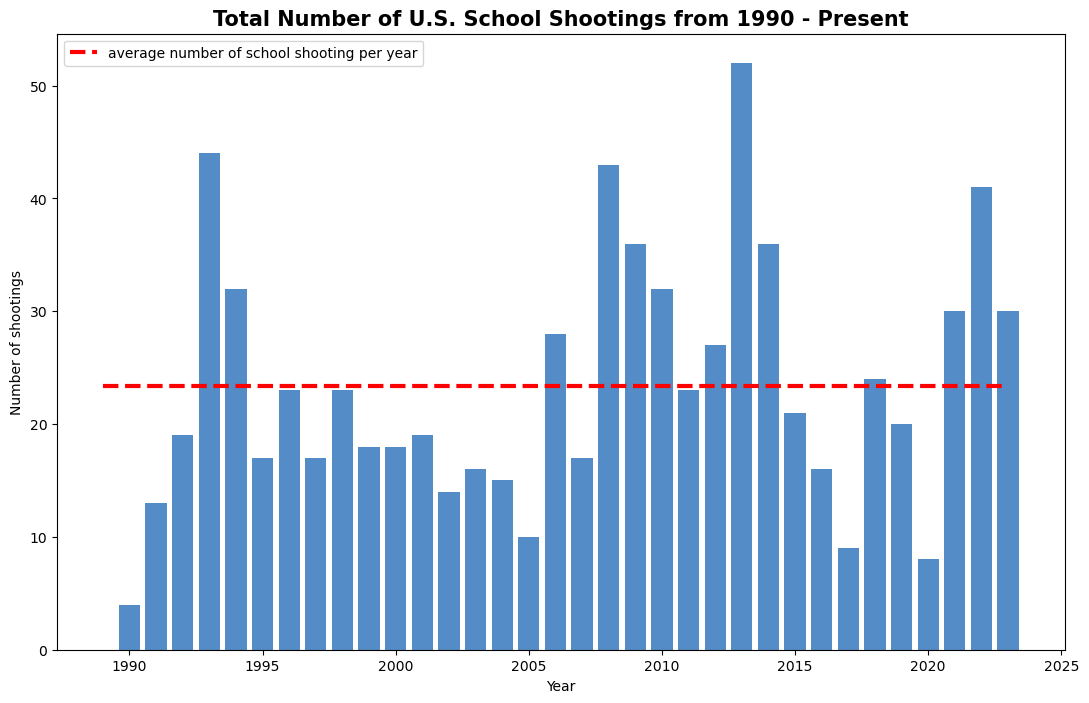

In [56]:
# get number of school shootings for each year
yearly_count = df.groupby('Year').size().reset_index().rename(columns={0:'Total'})

# get average number of school shootings per year
avg = yearly_count['Total'].mean()

# plot number of school shootings over time
plt.figure(figsize=(13,8))

plt.title('Total Number of U.S. School Shootings from 1990 - Present',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('Year')
plt.ylabel('Number of shootings')

plt.bar(yearly_count.Year,yearly_count.Total,color='#538cc6')
plt.hlines(avg,1989,2023,color='red',linestyle='dashed',linewidth=3,label='average number of school shooting per year')

plt.legend()

plt.show()

In [ ]:
# From the above plot shows, from 1990 to 1993, the number of school shootings in the U.S. had been sharply increasing. 
# After 1993, the number of shootings were on a steady decline and then sharply increased after 2005.
# Given the data on school shootings from 1990 to 2023 (June), the average number of school shooting per year is estimated to be around 24 After the year 2005, there has been an increase in frequency of years with school shootings that exceed the yearly average in the U.S.
# In 2020, U.S. experienced the lowest number of school shootings since 1990 and this is due to school lockdowns caused by the Covid19 pandemic. Unsurprisingly, along with the ease of restrictions and resume of in-person schooling, the number of school shootings surged once more.

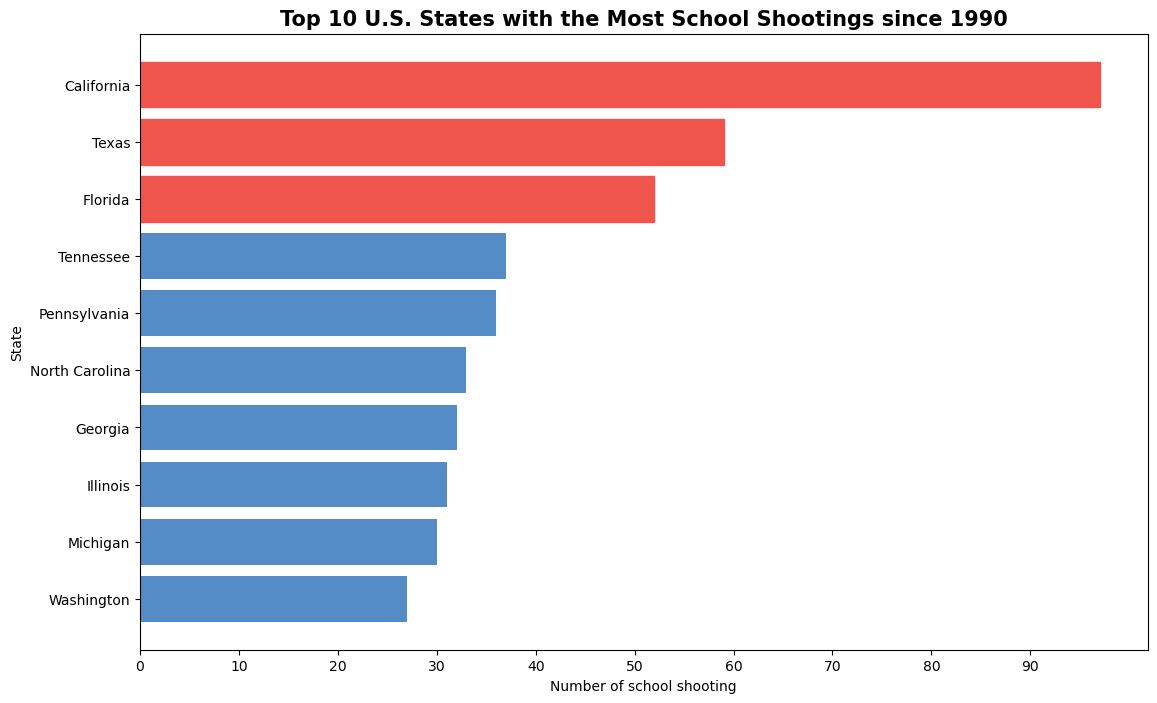

In [57]:
# total number of school shootings in each U.S. state
df_state = df.groupby('State').size().reset_index().rename(columns={0:'Total'}).sort_values(by='Total')


plt.figure(figsize=(13,8))

plt.title('Top 10 U.S. States with the Most School Shootings since 1990',fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('Number of school shooting')
plt.ylabel('State')

# plot the top 10 states with the most school shootings 
bars = plt.barh(df_state.State[-10:],df_state.Total[-10:], color='#538cc6')

# colour the top 3 states orange
for i in range(7,10):
    bars[i].set_color('#f0554d')
    

plt.xticks(np.arange(0,100,10))

plt.show()

In [ ]:
# From the above plot, we can see that the states of California, Texas and Florida have much higher school shootings compared to the other states that ranked in the top 10 highest states. Typically, the volume of crimes are related to the size of the population and that is the case here. Currently, Californa, Texas and Florida are the Top 3 U.S. States by Population Rank (3).

# Now let's take a look at the number of school shootings at the different levels of education.

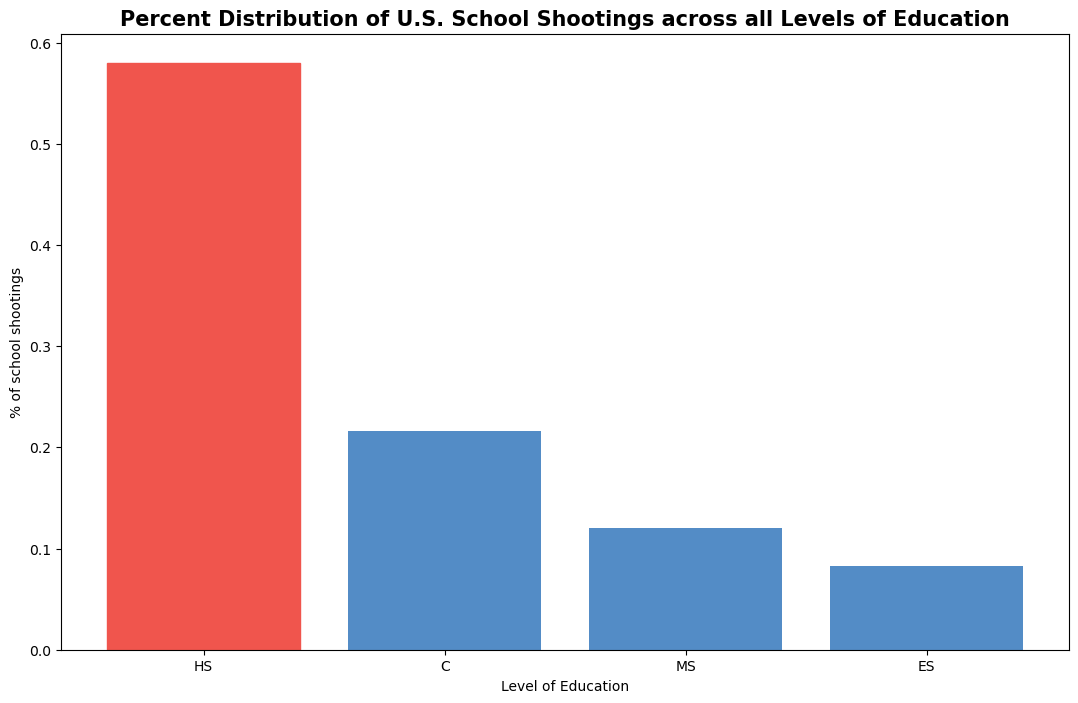

In [58]:
df_school = df.groupby('School')['School'].count().rename("percentage").transform(lambda x: x/x.sum())
df_school = df_school.reset_index().sort_values(by='percentage',ascending=False)
df_school.head()


plt.figure(figsize=(13,8))

plt.title("Percent Distribution of U.S. School Shootings across all Levels of Education",fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel("Level of Education")
plt.ylabel("% of school shootings")

bars = plt.bar(df_school.School,df_school.percentage, color = '#538cc6')
bars[0].set_color('#f0554d')

plt.show()

In [ ]:
# Based on the bar plot above, approximately 59% of all school shootings in the U.S. occured in high schools. This is not surprising as high school students are at an age where they are experiencing puberty or entering adulthood. For the majority of these high school shootings, the shooter is another student of the very same school. While the victims may not always be specifically targeted and it may have been either an impulsive or planned decision, the shooter entered the school premise with the intent to shoot for one reason or another.

In [59]:
# Which Cities have the most school shootings

# Assign the value_counts() results to a new data frame
city_shootings=df.City.value_counts().head(10).reset_index()
city_shootings.columns=['City','Total Shootings']

# Visualize the results
fig = px.bar(city_shootings, x="Total Shootings", y="City", orientation='h',color='City')
fig.show()

In [60]:
# Are there more cases of school shootings now? 

# Create a new colum that contains the year value from the Date column
df['year'] = pd.DatetimeIndex(df['Date']).year

# Assign the value_counts() results to a new data frame
annual_shootings=df.year.value_counts().reset_index()
annual_shootings.columns=['Year','Total Shootings']

# Visualize this 
fig = px.scatter(annual_shootings, x="Year", y="Total Shootings", size="Total Shootings", color="Total Shootings",
           hover_name="Total Shootings", log_x=True, size_max=60)
fig.show()

In [61]:
# Determine the most severe of shootings, anything more than 3 fatalities is severe
df['Severity']=df['Fatalities'].apply(lambda x: 'Severe' if x>3 else 'Bad' )
severe_shootings=df[df['Severity']=='Severe']

In [62]:
# Which States have the most severe shootings
state_severe=severe_shootings.State.value_counts().reset_index()
state_severe.columns=['State','Total Shootings']
fig=px.bar(state_severe,x='Total Shootings',y='State',orientation='h',color='State')
fig.show()

In [63]:
states=severe_shootings.groupby('State')['Fatalities'].apply(sum).reset_index().sort_values('Fatalities',ascending=False)
states

,State,Fatalities
15,Virginia,65
4,Connecticut,55
2,California,36
14,Texas,32
3,Colorado,30
10,Minnesota,20
11,Oregon,18
5,Florida,17
6,Illinois,11
7,Iowa,11


In [ ]:
# Final Results
1. Has the number of school shootings increased over the last couple of decades?

Yes, although school shootings have been an ongoing issue in the U.S., after the year 2005 there has been an increase in frequency of years with school shootings that exceed the yearly average in the U.S.

2. Which states experienced the most school shootings?

The Top 3 states that have the highest number of school shootings which far exceeds the other states are California, Texas and Florida.

3. Which school category experienced the most shootings?

Around 58% of school shootings have occurred in high schools.

4. Which state recorded severe fatalities (more than 3)?

Virginia recorded the highest fatalities of 65 while Kentucky has the minimum of 4 fatalities.

5. Are there more cases of school shootings now?

There has being a decline from 2013 to 2022, where 2013 recorded a total of 52 school shootings, while 41 was recorded in 2022.

6. Which City has the most school shootings?

hicargo has recorded the most school shootings between 1990 to 2022. It has a total of 18 School Shootings.
References
1) Wikipedia Contributors. (2019, February 25). School. Retrieved from Wikipedia; Wikimedia Foundation. https://en.wikipedia.org/wiki/School

‌ 2) Wikipedia Contributors. (2019, April 4). List of school shootings in the United States. Retrieved from Wikipedia; Wikimedia Foundation. https://en.wikipedia.org/wiki/List_of_school_shootings_in_the_United_States

‌ 3) Infoplease. (2017, February 11). State Population by Rank, 2015. Retrieved from InfoPlease. https://www.infoplease.com/us/states/state-population-by-rank

‌